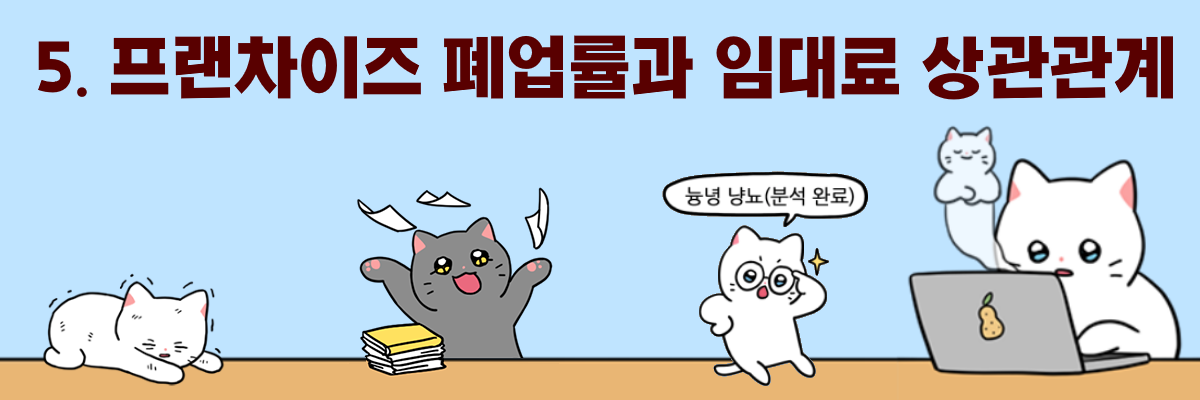

# 프랜차이즈 폐업률 vs 임대료

## 라이브러리 불러오기

In [ ]:
# !pip install html_parser
# !pip install html_table_parser

# html에서 찾은 테이블을 리스트 형태로 정리해서 받아주는 모듈

In [103]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

import time
import matplotlib.pyplot as plt

In [104]:
from bs4 import BeautifulSoup
from html_table_parser import parser_functions as parser

In [31]:
#!pip install beautifulsoup4
#!pip install --upgrade beautifulsoup4 # bs import 에러떠서 업그레이드 시켜줌
#!pip install --upgrade html5lib

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.4.1
    Uninstalling beautifulsoup4-4.4.1:
      Successfully uninstalled beautifulsoup4-4.4.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
html-table-parser 0.1.0 requires beautifulsoup4==4.4.1, but you have beautifulsoup4 4.10.0 which is incompatible.


**<1. 질병 관련 데이터>**
1. https://health.kdca.go.kr/healthinfo/biz/pblcVis/main.do  
   만성질환건강통계 - csv
   
   
2. https://knhanes.kdca.go.kr/knhanes/sub03/sub03_02_05.do  
   건강설문조사 - spss(sav)

**<2. 프랜차이즈 관련 데이터>** (임대료 폐업률 기업생존률)
1. https://golmok.seoul.go.kr/dataStudio.do  
   I Seoul U 우리마을가게 상권분석 서비스 데이터 스튜디오 - xlsx, crawling


## 데이터

### 임대료
- 셀레니움을 사용한 데이터 크롤링

In [62]:
driver = webdriver.Chrome('chromedriver')

In [63]:
driver.get('https://golmok.seoul.go.kr/regionAreaAnalysis.do')

In [64]:
# 비회원 로그인
elem = driver.find_element(By.CLASS_NAME,'btn.btn-guest')
elem.click()

* 필요한 데이터를 크롤링하여 df로 받아주는 함수

In [65]:
def crawling_money(selectYear, selectQu):
    select=Select(driver.find_element_by_id("selectYear"))
    select.select_by_index(selectYear) # index 0->2021 ~ 4->2017
    time.sleep(0.5)
    
    # 2020년 데이터 선택
    select=Select(driver.find_element_by_id("selectQu"))
    select.select_by_index(selectQu) # index 0-> 4분기 3-> 1분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("selectQuCondition"))
    select.select_by_index(1) # index 0->동분기 1-> 전분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induL"))
    select.select_by_index(1) # index 0~3 : 전체 / 외식업 / 서비스업 / 소매업
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induM"))
    select.select_by_index(0) # index 0~10 : 전체 / 한식 / 중식 / 일식 / 양식 / 제과
    # 6 패스트푸드 / 7치킨 / 8분식 / 9호프 / 10 커피
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("infoCategory"))
    select.select_by_index(8) # 0선택, 1점포수, 2신생기업생존율
    # 3연차별생존율 / 4평균영업기간 / 5개폐업수(률) / 6 인구수 / 7 소득가구수 / 8임대시세
    
    time.sleep(1)
    elem=driver.find_element_by_id("presentSearch")
    elem.click()
    
    time.sleep(1)
    table = driver.find_element_by_id('table1')
    result_html = driver.page_source
    result_soup = BeautifulSoup(result_html, 'html.parser')
    tag = result_soup.find('table',{'id':'table1'})
    html_table = parser.make2d(tag)
    html_table = parser.make2d(tag)

    table_index0=html_table[0]
#     print(table_index0)
    table_index2=html_table[2]
#     print(table_index1)
    for i in range(1,10):
        table_index2[i]=table_index0[i]+' '+table_index2[i]
#         print(table_index1[i])
    
    del html_table[1]
    del html_table[0]
    
    df=pd.DataFrame(html_table[1:], columns=html_table[0])
    
    return df

In [66]:
df_money_2021 = crawling_money(0,0)
df_money_2021

C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:19: DeprecationWarning: find_element_by_* commands are deprecated

,행정구역,2021년 1분기 전체,2021년 1분기 1층,2021년 1분기 1층 외,2021년 2분기 전체,2021년 2분기 1층,2021년 2분기 1층 외,2021년 3분기 전체,2021년 3분기 1층,2021년 3분기 1층 외
0,서울시 전체,"122,330","140,868","104,182","119,818","138,620","100,993","124,146","142,792","105,956"
1,종로구,"165,901","198,296","136,242","163,304","195,121","135,221","170,169","203,883","139,341"
2,청운효자동,"141,792","162,329","93,692","137,074","163,704","87,974","146,641","183,465","79,977"
3,사직동,"139,286","196,087","109,826","136,352","184,584","108,757","138,392","186,024","111,091"
4,삼청동,"164,600","190,705","101,202","175,886","199,502","135,601","171,519","188,364","136,707"
...,...,...,...,...,...,...,...,...,...,...
445,성내2동,"99,830","105,871","84,082","100,233","112,301","67,409","100,684","115,860","64,131"
446,성내3동,"109,401","125,340","86,519","93,660","116,355","60,337","94,110","114,027","65,904"
447,길동,"98,394","117,865","66,854","100,621","117,661","73,055","97,607","117,124","67,155"
448,둔촌1동,,,,,,,,,


In [67]:
df_money_2020 = crawling_money(1,1)
df_money_2020

C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/325286063.py:19: DeprecationWarning: find_element_by_* commands are deprecated

,행정구역,2020년 1분기 전체,2020년 1분기 1층,2020년 1분기 1층 외,2020년 2분기 전체,2020년 2분기 1층,2020년 2분기 1층 외,2020년 3분기 전체,2020년 3분기 1층,2020년 3분기 1층 외
0,서울시 전체,"120,854","135,148","106,287","123,845","140,151","108,130","123,953","140,260","108,221"
1,종로구,"175,410","214,855","142,856","170,556","207,758","137,585","169,274","205,895","137,462"
2,청운효자동,"140,431","165,848","95,374","140,325","160,242","102,023","134,432","152,656","99,025"
3,사직동,"123,849","177,228","105,939","133,339","200,198","105,836","133,929","202,244","105,045"
4,삼청동,"144,577","171,226","57,970","160,430","183,892","64,904","165,197","187,342","76,618"
...,...,...,...,...,...,...,...,...,...,...
445,성내2동,"85,183","101,245","56,710","89,456","97,042","75,006","92,529","101,109","75,223"
446,성내3동,"105,479","130,074","55,427","122,888","136,060","100,508","124,091","138,189","102,813"
447,길동,"92,296","109,346","69,456","96,572","115,506","68,058","99,884","115,937","73,092"
448,둔촌1동,,,,,,,,,


### 폐업률
- 데이터 크롤링

In [68]:
def crawling_close(selectYear, selectQu):
    select=Select(driver.find_element_by_id("selectYear"))
    select.select_by_index(selectYear) # index 0->2021 ~ 4->2017
    time.sleep(0.5)
    
    # 2020년 데이터 선택
    select=Select(driver.find_element_by_id("selectQu"))
    select.select_by_index(selectQu) # index 0-> 4분기 3-> 1분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("selectQuCondition"))
    select.select_by_index(1) # index 0->동분기 1-> 전분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induL"))
    select.select_by_index(1) # index 0~3 : 전체 / 외식업 / 서비스업 / 소매업
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induM"))
    select.select_by_index(0) # index 0~10 : 전체 / 한식 / 중식 / 일식 / 양식 / 제과
    # 6 패스트푸드 / 7치킨 / 8분식 / 9호프 / 10 커피
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("infoCategory"))
    select.select_by_index(5) # 0선택, 1점포수, 2신생기업생존율
    # 3연차별생존율 / 4평균영업기간 / 5개폐업수(률) / 6 인구수 / 7 소득가구수 / 8임대시세
    
    time.sleep(1)
    elem=driver.find_element_by_id("presentSearch")
    elem.click()
    
    time.sleep(1)
    table = driver.find_element_by_id('table1')
    result_html = driver.page_source
    result_soup = BeautifulSoup(result_html, 'html.parser')
    tag = result_soup.find('table',{'id':'table1'})
    html_table = parser.make2d(tag)
    html_table = parser.make2d(tag)

    table_index0=html_table[0]
#     print(table_index0)
    table_index1=html_table[1]
#     print(table_index1)
    for i in range(2,14):
        table_index1[i]=table_index0[i]+' '+table_index1[i]
#         print(table_index1[i])
    

    del html_table[0]
    
    df=pd.DataFrame(html_table[1:], columns=html_table[0])
    
    return df

In [70]:
df_close_2021=crawling_close(0,0)
df_close_2021

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:19: DeprecationWarning: find_element_by_* commands are depre

,행정구역,생활밀접업종,2021년 1분기 개업수,2021년 1분기 폐업수,2021년 1분기 개업률,2021년 1분기 폐업률,2021년 2분기 개업수,2021년 2분기 폐업수,2021년 2분기 개업률,2021년 2분기 폐업률,2021년 3분기 개업수,2021년 3분기 폐업수,2021년 3분기 개업률,2021년 3분기 폐업률
0,서울시 전체,외식업/전체,"4,948","4,228",3.3,2.8,"7,056","5,886",4.7,3.9,"5,518","4,985",3.7,3.3
1,종로구,외식업/전체,164,180,2.3,2.5,242,234,3.4,3.3,190,209,2.7,2.9
2,청운효자동,외식업/전체,12,7,4.1,2.4,14,15,4.8,5.2,18,13,6.1,4.4
3,사직동,외식업/전체,27,27,2.7,2.7,34,27,3.4,2.7,29,32,2.9,3.2
4,삼청동,외식업/전체,0,6,0,2.3,10,8,3.7,3,8,5,2.9,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,12,8,3,2,15,14,3.8,3.5,9,7,2.2,1.7
446,성내3동,외식업/전체,20,23,3.3,3.8,28,27,4.6,4.5,13,16,2.2,2.7
447,길동,외식업/전체,34,24,4.4,3.1,43,27,5.5,3.4,29,32,3.7,4.1
448,둔촌1동,외식업/전체,0,0,0,0,1,1,16.7,16.7,0,0,0,0


In [71]:
df_close_2020=crawling_close(1,1)
df_close_2020

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2338630787.py:19: DeprecationWarning: find_element_by_* commands are depre

,행정구역,생활밀접업종,2020년 1분기 개업수,2020년 1분기 폐업수,2020년 1분기 개업률,2020년 1분기 폐업률,2020년 2분기 개업수,2020년 2분기 폐업수,2020년 2분기 개업률,2020년 2분기 폐업률,2020년 3분기 개업수,2020년 3분기 폐업수,2020년 3분기 개업률,2020년 3분기 폐업률
0,서울시 전체,외식업/전체,"5,620","6,244",3.8,4.3,"5,856","5,022",4,3.4,"6,262","6,077",4.2,4.1
1,종로구,외식업/전체,182,229,2.5,3.2,183,207,2.5,2.9,197,242,2.8,3.4
2,청운효자동,외식업/전체,7,16,2.5,5.7,9,7,3.1,2.4,10,11,3.5,3.9
3,사직동,외식업/전체,27,35,2.7,3.5,26,29,2.6,2.9,28,38,2.8,3.8
4,삼청동,외식업/전체,8,10,2.8,3.5,9,9,3.2,3.2,5,9,1.8,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,14,20,3.5,5,19,16,4.7,4,9,14,2.3,3.5
446,성내3동,외식업/전체,31,24,5.2,4,15,21,2.5,3.6,28,25,4.7,4.2
447,길동,외식업/전체,39,40,5.2,5.3,28,20,3.7,2.6,31,39,4.1,5.2
448,둔촌1동,외식업/전체,0,0,0,0,0,0,0,0,0,0,0,0


##### 임대료 + 폐업률

In [72]:
df= pd.merge(df_money_2021,
             df_close_2021,
             left_on='행정구역', right_on='행정구역', how='inner')

In [73]:
df.columns

Index(['행정구역', '2021년 1분기 전체', '2021년 1분기 1층', '2021년 1분기 1층 외',
       '2021년 2분기 전체', '2021년 2분기 1층', '2021년 2분기 1층 외', '2021년 3분기 전체',
       '2021년 3분기 1층', '2021년 3분기 1층 외', '생활밀접업종', '2021년 1분기 개업수',
       '2021년 1분기 폐업수', '2021년 1분기 개업률', '2021년 1분기 폐업률', '2021년 2분기 개업수',
       '2021년 2분기 폐업수', '2021년 2분기 개업률', '2021년 2분기 폐업률', '2021년 3분기 개업수',
       '2021년 3분기 폐업수', '2021년 3분기 개업률', '2021년 3분기 폐업률'],
      dtype='object')

In [74]:
columns_name=[]
for i in range(1,4):
    aa = '2021년 '+ str(i)+'분기 전체'
    bb = '2021년 '+ str(i)+'분기 1층'
    cc = '2021년 '+ str(i)+'분기 1층 외'
    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)
    
for i in columns_name:
    df[i]=df[i].str.replace(',','').replace('','0').astype('int64')

In [75]:
columns_name=[]
for i in range(1,4):
    aa = '2021년 '+ str(i)+'분기 개업수'
    bb = '2021년 '+ str(i)+'분기 폐업수'
    cc = '2021년 '+ str(i)+'분기 개업률'
    dd = '2021년 '+ str(i)+'분기 폐업률'
    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)
    columns_name.append(dd)
    
for i in columns_name:
    df[i]=df[i].str.replace(',','').replace('','0').astype('float64')

In [76]:
df_money_close=df.copy()

In [77]:
df_money_close.columns

Index(['행정구역', '2021년 1분기 전체', '2021년 1분기 1층', '2021년 1분기 1층 외',
       '2021년 2분기 전체', '2021년 2분기 1층', '2021년 2분기 1층 외', '2021년 3분기 전체',
       '2021년 3분기 1층', '2021년 3분기 1층 외', '생활밀접업종', '2021년 1분기 개업수',
       '2021년 1분기 폐업수', '2021년 1분기 개업률', '2021년 1분기 폐업률', '2021년 2분기 개업수',
       '2021년 2분기 폐업수', '2021년 2분기 개업률', '2021년 2분기 폐업률', '2021년 3분기 개업수',
       '2021년 3분기 폐업수', '2021년 3분기 개업률', '2021년 3분기 폐업률'],
      dtype='object')

* 동이 너무 많아서 구단위로 확인 할 수 있게끔 바꾸려고 함

In [78]:
# 구만 만들 수 있도록
df_join_gu=pd.DataFrame({'구':['강남구','강동구','강북구','강서구','관악구',
                             '광진구','구로구','금천구','노원구','도봉구',
                             '동대문구','동작구','마포구','서대문구','서초구',
                             '성동구','성북구','송파구','양천구','영등포구',
                             '용산구','은평구','종로구','중구','중랑구']})

In [79]:
df_money_close= pd.merge(df_money_close,
                         df_join_gu,
                         left_on='행정구역', right_on='구', how='inner')
df_money_close

,행정구역,2021년 1분기 전체,2021년 1분기 1층,2021년 1분기 1층 외,2021년 2분기 전체,2021년 2분기 1층,2021년 2분기 1층 외,2021년 3분기 전체,2021년 3분기 1층,2021년 3분기 1층 외,...,2021년 1분기 폐업률,2021년 2분기 개업수,2021년 2분기 폐업수,2021년 2분기 개업률,2021년 2분기 폐업률,2021년 3분기 개업수,2021년 3분기 폐업수,2021년 3분기 개업률,2021년 3분기 폐업률,구
0,종로구,165901,198296,136242,163304,195121,135221,170169,203883,139341,...,2.5,242.0,234.0,3.4,3.3,190.0,209.0,2.7,2.9,종로구
1,중구,230151,242787,223571,215394,233703,206132,218683,239303,208242,...,2.4,194.0,223.0,2.9,3.3,157.0,157.0,2.3,2.3,중구
2,용산구,120687,139914,98521,121314,140669,98869,123671,143351,102014,...,3.1,182.0,187.0,3.6,3.7,188.0,162.0,3.7,3.2,용산구
3,성동구,109351,127521,91543,116909,133486,101824,121117,137190,106927,...,2.9,239.0,183.0,5.4,4.1,195.0,164.0,4.3,3.7,성동구
4,광진구,98927,119912,70922,99730,122309,71003,104453,128455,73680,...,2.6,264.0,197.0,4.9,3.6,211.0,189.0,3.9,3.5,광진구
5,동대문구,94387,115596,62440,96681,115614,66964,98537,118258,68630,...,2.5,241.0,220.0,4.7,4.3,204.0,175.0,3.9,3.4,동대문구
6,중랑구,91905,108321,69774,93037,109644,70103,93591,108732,72565,...,2.8,237.0,208.0,5.3,4.6,181.0,144.0,4.0,3.2,중랑구
7,성북구,92114,114651,63418,94429,115067,66360,98180,117719,71465,...,2.6,242.0,183.0,4.9,3.7,190.0,174.0,3.8,3.5,성북구
8,강북구,86805,103225,58620,86360,102135,58411,90147,105520,64310,...,3.0,201.0,196.0,4.9,4.8,159.0,155.0,3.9,3.8,강북구
9,도봉구,82208,100317,56146,81252,99069,54297,85930,103607,57783,...,2.5,154.0,127.0,4.8,4.0,125.0,124.0,3.9,3.9,도봉구


### 신생기업 생존률

In [81]:
def crawling_new_survive(selectYear, selectQu):
    select=Select(driver.find_element_by_id("selectYear"))
    select.select_by_index(selectYear) # index 0->2021 ~ 4->2017
    time.sleep(0.5)
    
    # 2020년 데이터 선택
    select=Select(driver.find_element_by_id("selectQu"))
    select.select_by_index(selectQu) # index 0-> 4분기 3-> 1분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("selectQuCondition"))
    select.select_by_index(1) # index 0->동분기 1-> 전분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induL"))
    select.select_by_index(1) # index 0~3 : 전체 / 외식업 / 서비스업 / 소매업
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induM"))
    select.select_by_index(0) # index 0~10 : 전체 / 한식 / 중식 / 일식 / 양식 / 제과
    # 6 패스트푸드 / 7치킨 / 8분식 / 9호프 / 10 커피
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("infoCategory"))
    select.select_by_index(2) # 0선택, 1점포수, 2신생기업생존율
    # 3연차별생존율 / 4평균영업기간 / 5개폐업수(률) / 6 인구수 / 7 소득가구수 / 8임대시세
    
    time.sleep(1)
    elem=driver.find_element_by_id("presentSearch")
    elem.click()
    
    time.sleep(1)
    table = driver.find_element_by_id('table1')
    result_html = driver.page_source
    result_soup = BeautifulSoup(result_html, 'html.parser')
    tag = result_soup.find('table',{'id':'table1'})
    html_table = parser.make2d(tag)
    html_table = parser.make2d(tag)

    table_index0=html_table[0]
#     print(table_index0)
    table_index1=html_table[1]
#     print(table_index1)
    for i in range(2,11):
        table_index1[i]=table_index0[i]+' '+table_index1[i]
#         print(table_index1[i])
    

    del html_table[0]
    
    df=pd.DataFrame(html_table[1:], columns=html_table[0])
    
    return df

In [82]:
df_survive=crawling_new_survive(0,0)
df_survive

C:\Users\User\AppData\Local\Temp/ipykernel_3776/4006323969.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/4006323969.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/4006323969.py:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/4006323969.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/4006323969.py:19: DeprecationWarning: find_element_by_* commands are depre

,행정구역,생활밀접업종,2021년 1분기 1년생존율,2021년 1분기 3년생존율,2021년 1분기 5년생존율,2021년 2분기 1년생존율,2021년 2분기 3년생존율,2021년 2분기 5년생존율,2021년 3분기 1년생존율,2021년 3분기 3년생존율,2021년 3분기 5년생존율
0,서울시 전체,외식업/전체,76.5,45.9,29,76.6,46.7,29.3,76.9,47.5,29.7
1,종로구,외식업/전체,79.7,50,36.7,81,51.8,37.3,81.7,53.4,37.4
2,청운효자동,외식업/전체,86,40.5,41.8,84.2,54.3,37.3,86.1,55.3,42.1
3,사직동,외식업/전체,76.3,51,41.4,81.1,56.3,38.2,83.5,55.9,37.7
4,삼청동,외식업/전체,73.5,52.8,33.3,79.4,51.4,48.1,78.1,45,47.6
...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,74.3,46.1,29.4,71.2,44.7,27.1,76.6,42.3,27.3
446,성내3동,외식업/전체,75.2,43.5,25,72.7,47.9,21.4,74.7,55.9,25.2
447,길동,외식업/전체,71.7,38.7,19.9,67.4,41.2,22.3,69,41,24.1
448,둔촌1동,외식업/전체,100,-,0,50,-,0,0,-,50


In [83]:
df_survive=pd.merge(df_survive,
                   df_join_gu,
                   left_on='행정구역', right_on='구', how='inner')
df_survive

,행정구역,생활밀접업종,2021년 1분기 1년생존율,2021년 1분기 3년생존율,2021년 1분기 5년생존율,2021년 2분기 1년생존율,2021년 2분기 3년생존율,2021년 2분기 5년생존율,2021년 3분기 1년생존율,2021년 3분기 3년생존율,2021년 3분기 5년생존율,구
0,종로구,외식업/전체,79.7,50,36.7,81,51.8,37.3,81.7,53.4,37.4,종로구
1,중구,외식업/전체,79.6,51.7,35.3,81.1,50.8,35.6,82.5,52.2,35.9,중구
2,용산구,외식업/전체,80.3,50.1,30.8,80.8,48.9,30.9,81.1,50.6,30.4,용산구
3,성동구,외식업/전체,78.8,50,30.4,80,50.2,30.7,81,48.9,31.8,성동구
4,광진구,외식업/전체,77.3,47.1,29.4,74.7,48.7,31.4,74.8,49.3,31.9,광진구
5,동대문구,외식업/전체,77.8,47.2,27,78.9,45.8,28,79.3,47.1,28.5,동대문구
6,중랑구,외식업/전체,72,42.2,26.8,72.2,42.4,29,73.6,43.6,27.6,중랑구
7,성북구,외식업/전체,81.7,46.9,28.6,82.1,47.6,28.5,81.2,49,28.9,성북구
8,강북구,외식업/전체,74.1,41.5,24.5,74.4,39.3,24.4,71.3,41.8,24.8,강북구
9,도봉구,외식업/전체,77.3,43.9,28.3,76.1,44.2,29.8,77.2,45.8,28.8,도봉구


In [84]:
df_survive_2021=df_survive.copy()

In [85]:
df_survive_2021= pd.merge(df_money_2021,
             df_survive_2021,
             left_on='행정구역', right_on='행정구역', how='inner')

In [86]:
df_survive_2021

,행정구역,2021년 1분기 전체,2021년 1분기 1층,2021년 1분기 1층 외,2021년 2분기 전체,2021년 2분기 1층,2021년 2분기 1층 외,2021년 3분기 전체,2021년 3분기 1층,2021년 3분기 1층 외,...,2021년 1분기 1년생존율,2021년 1분기 3년생존율,2021년 1분기 5년생존율,2021년 2분기 1년생존율,2021년 2분기 3년생존율,2021년 2분기 5년생존율,2021년 3분기 1년생존율,2021년 3분기 3년생존율,2021년 3분기 5년생존율,구
0,종로구,"165,901","198,296","136,242","163,304","195,121","135,221","170,169","203,883","139,341",...,79.7,50,36.7,81,51.8,37.3,81.7,53.4,37.4,종로구
1,중구,"230,151","242,787","223,571","215,394","233,703","206,132","218,683","239,303","208,242",...,79.6,51.7,35.3,81.1,50.8,35.6,82.5,52.2,35.9,중구
2,용산구,"120,687","139,914","98,521","121,314","140,669","98,869","123,671","143,351","102,014",...,80.3,50.1,30.8,80.8,48.9,30.9,81.1,50.6,30.4,용산구
3,성동구,"109,351","127,521","91,543","116,909","133,486","101,824","121,117","137,190","106,927",...,78.8,50,30.4,80,50.2,30.7,81,48.9,31.8,성동구
4,광진구,"98,927","119,912","70,922","99,730","122,309","71,003","104,453","128,455","73,680",...,77.3,47.1,29.4,74.7,48.7,31.4,74.8,49.3,31.9,광진구
5,동대문구,"94,387","115,596","62,440","96,681","115,614","66,964","98,537","118,258","68,630",...,77.8,47.2,27,78.9,45.8,28,79.3,47.1,28.5,동대문구
6,중랑구,"91,905","108,321","69,774","93,037","109,644","70,103","93,591","108,732","72,565",...,72,42.2,26.8,72.2,42.4,29,73.6,43.6,27.6,중랑구
7,성북구,"92,114","114,651","63,418","94,429","115,067","66,360","98,180","117,719","71,465",...,81.7,46.9,28.6,82.1,47.6,28.5,81.2,49,28.9,성북구
8,강북구,"86,805","103,225","58,620","86,360","102,135","58,411","90,147","105,520","64,310",...,74.1,41.5,24.5,74.4,39.3,24.4,71.3,41.8,24.8,강북구
9,도봉구,"82,208","100,317","56,146","81,252","99,069","54,297","85,930","103,607","57,783",...,77.3,43.9,28.3,76.1,44.2,29.8,77.2,45.8,28.8,도봉구


In [87]:
df_survive_2021.columns

Index(['행정구역', '2021년 1분기 전체', '2021년 1분기 1층', '2021년 1분기 1층 외',
       '2021년 2분기 전체', '2021년 2분기 1층', '2021년 2분기 1층 외', '2021년 3분기 전체',
       '2021년 3분기 1층', '2021년 3분기 1층 외', '생활밀접업종', '2021년 1분기 1년생존율',
       '2021년 1분기 3년생존율', '2021년 1분기 5년생존율', '2021년 2분기 1년생존율',
       '2021년 2분기 3년생존율', '2021년 2분기 5년생존율', '2021년 3분기 1년생존율',
       '2021년 3분기 3년생존율', '2021년 3분기 5년생존율', '구'],
      dtype='object')

In [88]:
columns_name=[]
for i in range(1,4):
    aa = '2021년 '+ str(i)+'분기 전체'
    bb = '2021년 '+ str(i)+'분기 1층'
    cc = '2021년 '+ str(i)+'분기 1층 외'
    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)
    
for i in columns_name:
    df_survive_2021[i]=df_survive_2021[i].str.replace(',','').replace('','0').astype('int64')

In [89]:
columns_name=[]
for i in range(1,4):
    aa = '2021년 '+ str(i)+'분기 1년생존율'
    bb = '2021년 '+ str(i)+'분기 3년생존율'
    cc = '2021년 '+ str(i)+'분기 5년생존율'

    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)

for i in columns_name:
    df_survive_2021[i]=df_survive_2021[i].str.replace(',','').replace('','0').astype('float64')

## 분석 & 시각화

### 임대료와 폐업률

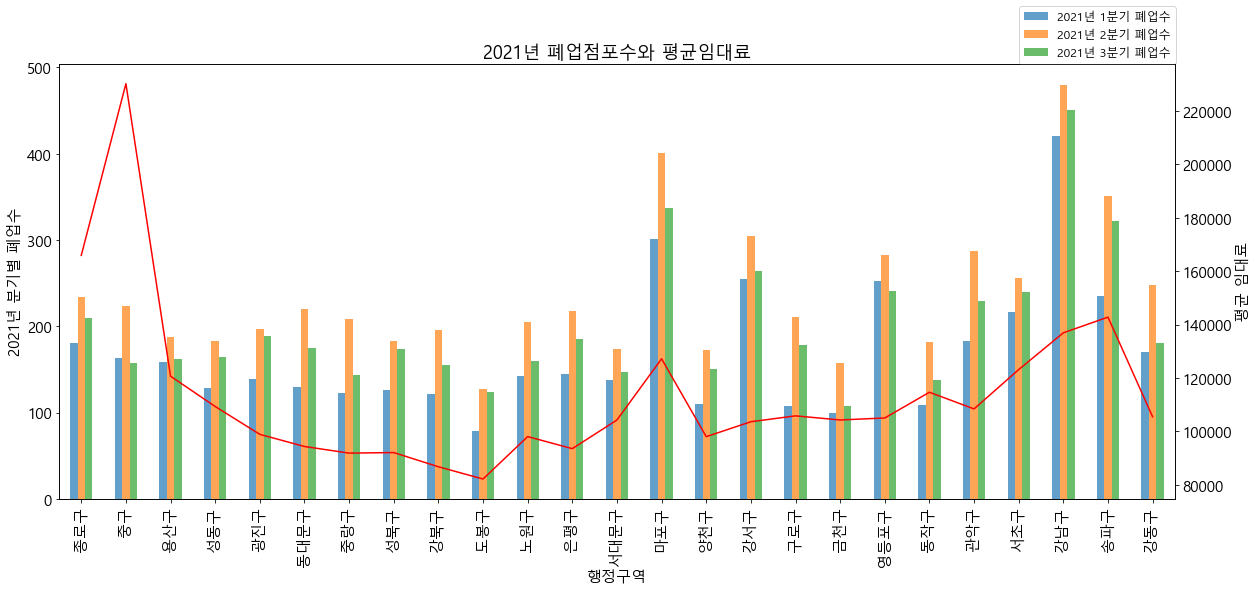

In [288]:
plt.rc('font', family='Malgun Gothic')
# df_2018_pig1= df_2018_pig1.sort_values(by=['2018년 1분기 프랜차이즈점포수'], ascending=False) 

ax1=df_money_close.plot(x="행정구역", y=["2021년 1분기 폐업수","2021년 2분기 폐업수",
                                    "2021년 3분기 폐업수"], kind="bar",figsize=(20,8), alpha=0.7)
plt.ylabel('2021년 분기별 폐업수')
plt.legend(loc=(0.86,1))

ax2=ax1.twinx()
ax2.plot(df_money_close['행정구역'],df_money_close['2021년 1분기 전체'],'r')
plt.ylabel('평균 임대료')

plt.title('2021년 폐업점포수와 평균임대료')

plt.show()

In [296]:
df_money_close.to_csv('df_money_close.csv')

### 임대료와 신생기업 생존률

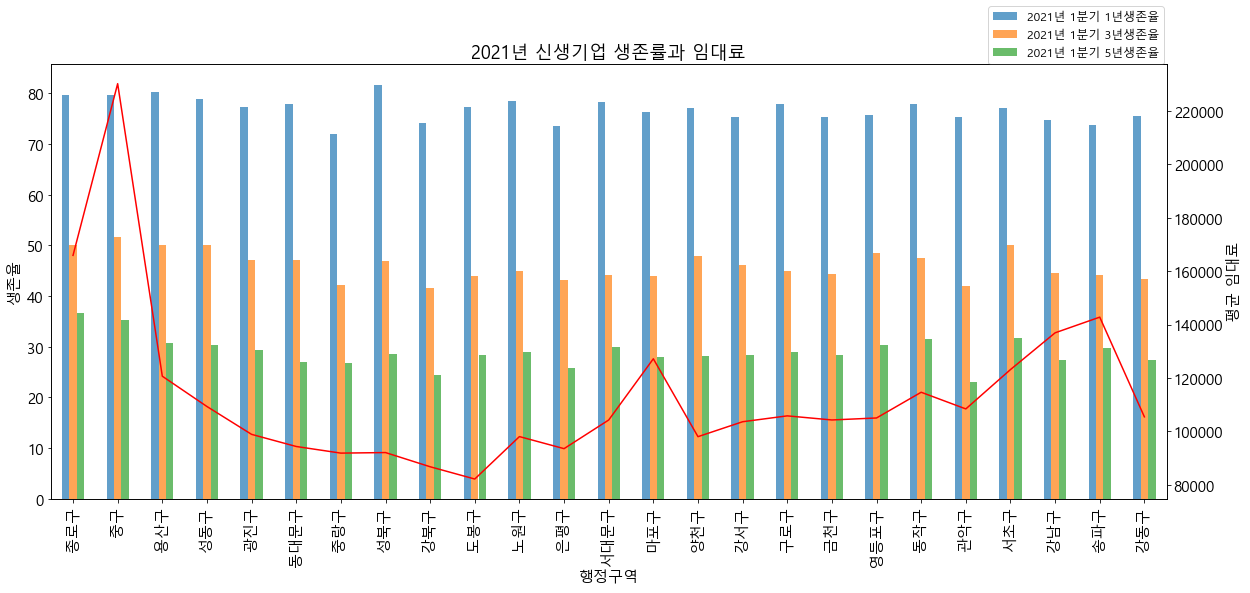

In [287]:
plt.rc('font', family='Malgun Gothic')
# df_2018_pig1= df_2018_pig1.sort_values(by=['2018년 1분기 프랜차이즈점포수'], ascending=False) 

ax1=df_survive_2021.plot(x="행정구역", y=["2021년 1분기 1년생존율","2021년 1분기 3년생존율",
                                    "2021년 1분기 5년생존율"], kind="bar",figsize=(20,8), alpha=0.7)

plt.ylabel('생존율')
plt.legend(loc=(0.84,1))

ax2=ax1.twinx()
ax2.plot(df_survive_2021['행정구역'], df_survive_2021['2021년 1분기 전체'],'r')
plt.ylabel('평균 임대료')
plt.title('2021년 신생기업 생존률과 임대료')
plt.show()

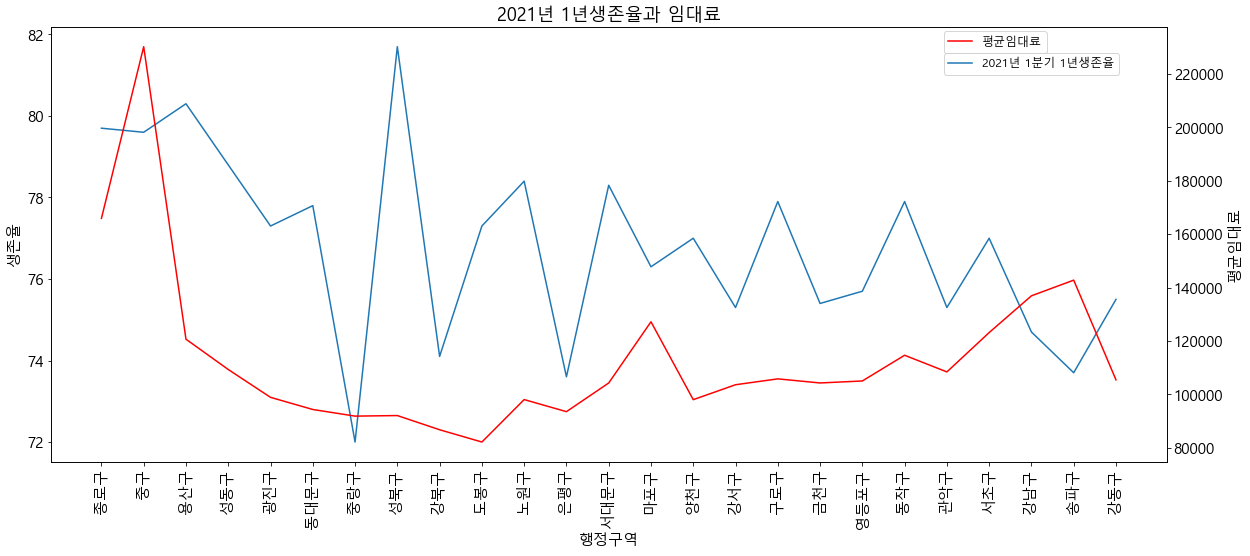

In [290]:
plt.rc('font', family='Malgun Gothic')

ax1=df_survive_2021.plot(x="행정구역", y="2021년 1분기 1년생존율",figsize=(20,8))

plt.legend(loc=(0.8,0.89))
plt.xticks(rotation=90)
plt.ylabel('생존율')

ax2=ax1.twinx()
ax2.plot(df_survive_2021['행정구역'], df_survive_2021['2021년 1분기 전체'],'r',label='평균임대료')
plt.title('2021년 1년생존율과 임대료')
plt.ylabel('평균임대료')
plt.legend(loc=(0.8,0.94))

plt.show()

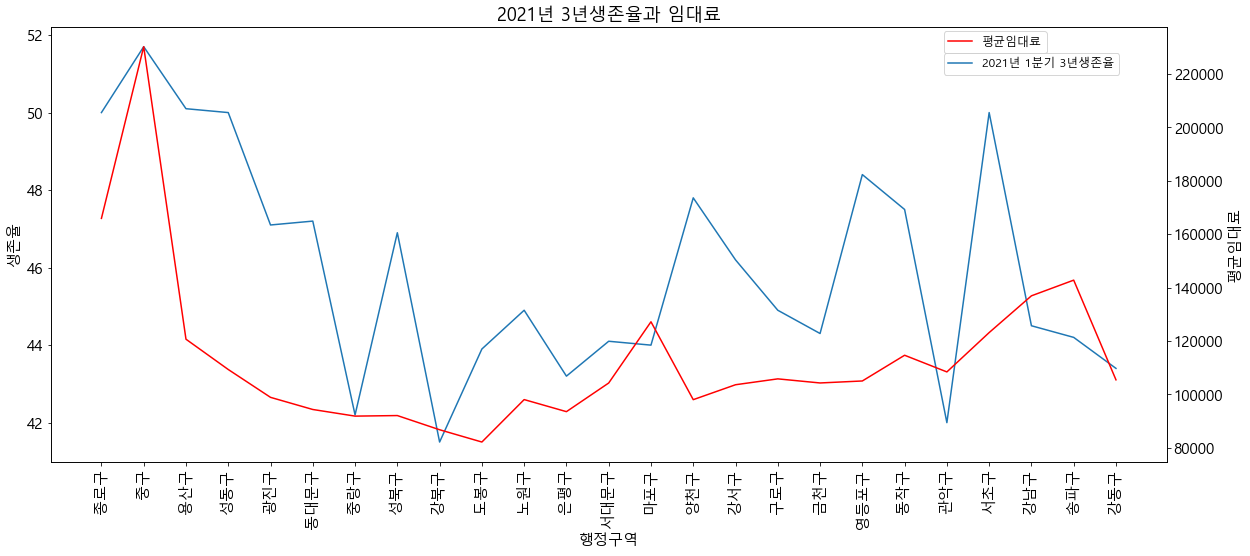

In [291]:
ax1=df_survive_2021.plot(x="행정구역", y="2021년 1분기 3년생존율",figsize=(20,8))

plt.legend(loc=(0.8,0.89))
plt.xticks(rotation=90)
plt.ylabel('생존율')

ax2=ax1.twinx()
ax2.plot(df_survive_2021['행정구역'], df_survive_2021['2021년 1분기 전체'],'r',label='평균임대료')
plt.title('2021년 3년생존율과 임대료')
plt.ylabel('평균임대료')
plt.legend(loc=(0.8,0.94))

plt.show()

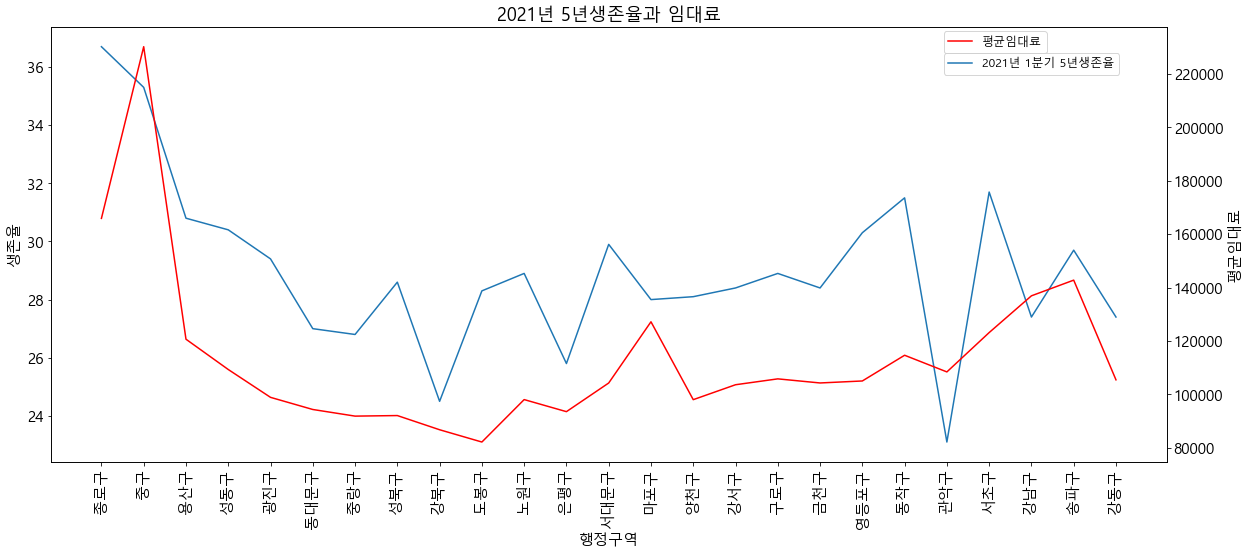

In [292]:
ax1=df_survive_2021.plot(x="행정구역", y="2021년 1분기 5년생존율",figsize=(20,8), label='2021년 1분기 5년생존율')

plt.xticks(rotation=90)
plt.ylabel('생존율')
plt.legend(loc=(0.8,0.89))

ax2=ax1.twinx()
ax2.plot(df_survive_2021['행정구역'], df_survive_2021['2021년 1분기 전체'],'r',label='평균임대료')

plt.title('2021년 5년생존율과 임대료')
plt.ylabel('평균임대료')
plt.legend(loc=(0.8,0.94))

plt.show()

In [297]:
df_survive_2021.to_csv('df_survive_2021.csv')

### 분석결과
1. 영업연차가 길어질수록 생존율이 임대료에 영향을 받음.
2. 평균임대료와 생존율과 비례함
3. 임대료가 낮을수록 생존율이 높을 것이라는 예상과는 달리 임대료가 높을수록 생존율이 높은 결과가 나옴.
  - 임대료 지원사업을 할 경우, 임대료가 높은 곳에 지원을 많이 하는 방향보다는  
    평균임대료와는 상관없이 지원을 하여, 임대료가 낮은 지역에서 상대적으로 지원을 많이 받을 수 있도록 하는 것이 더 좋아보임.
  - 직접 창업을 할 경우, 다른 요건이 좋다면 임대료가 높더라도 과감하게 창업을 하는 방법 또한 좋은 방법이 될 수 있어보임.

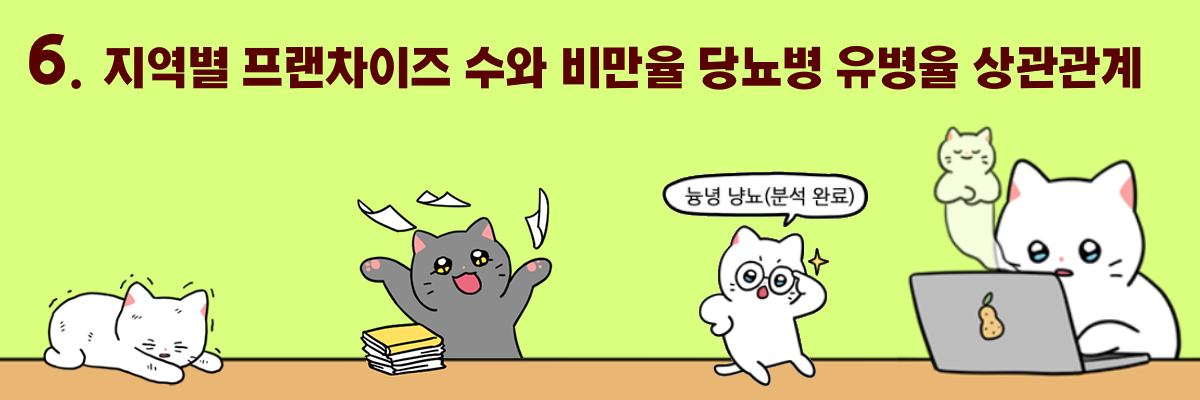

# 지역별 프랜차이즈 지점수 VS 당뇨병 유병율 상관관계

* 지역별 질병율(당뇨/비만 등)  
  vs  
  지역별 프랜차이즈 (프랜차이즈 지점 갯수)  
  (업종별, 지점수, 매출액)
  
  
* 어떤 업종의 프랜차이즈가 많으면 상관관계가 많은 질병에  
  좋은 무언가를 창업한다  
ex) 만약, 비만 - 외식업 프랜차이즈에서 상관관계가 크다면   
    외식업 프랜차이즈가 생긴 지역에 → 비만 클리닉과 같은 관련 업종을 만들 수 있음

## 데이터

### 외식업 점포수
* 셀레니움을 사용하여 크롤링
* 지역별 점포수, 업종별 점포수
* 비만 데이터가 18, 19년 이므로 18, 19년, 외식업을 우선적으로 크롤링

In [224]:
driver = webdriver.Chrome('./data/chromedriver')

C:\Users\User\AppData\Local\Temp/ipykernel_3776/3519339098.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./data/chromedriver')


In [5]:
driver.get('https://golmok.seoul.go.kr/regionAreaAnalysis.do')

In [6]:
# 비회원 로그인
elem = driver.find_element(By.CLASS_NAME,'btn.btn-guest')
elem.click()

In [7]:
# 년도 선택
select=Select(driver.find_element_by_id("selectYear"))
select.select_by_index(1) # index 0->2021 ~ 4->2017
# 2020년 데이터 선택

C:\Users\User\AppData\Local\Temp/ipykernel_3776/3859169492.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))


In [8]:
# 분기 선택
select=Select(driver.find_element_by_id("selectQu"))
select.select_by_index(0) # index 0-> 4분기 3-> 1분기

C:\Users\User\AppData\Local\Temp/ipykernel_3776/1232321725.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))


In [9]:
# 분기 정렬 방식 선택
select=Select(driver.find_element_by_id("selectQuCondition"))
select.select_by_index(1) # index 0->동분기 1-> 전분기

C:\Users\User\AppData\Local\Temp/ipykernel_3776/176586220.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))


In [10]:
# 업종 선택
select=Select(driver.find_element_by_id("induL"))
select.select_by_index(1) # index 0~3 : 전체 / 외식업 / 서비스업 / 소매업

C:\Users\User\AppData\Local\Temp/ipykernel_3776/1076437276.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))


In [11]:
# 자세한 업종 선택
select=Select(driver.find_element_by_id("induM"))
select.select_by_index(0) # 외식업 - index 0~10 : 전체 / 한식 / 중식 / 일식 / 양식 / 제과
# 6 패스트푸드 / 7치킨 / 8분식 / 9호프 / 10 커피

C:\Users\User\AppData\Local\Temp/ipykernel_3776/730763777.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induM"))


In [12]:
# 찾고 싶은 데이터
select=Select(driver.find_element_by_id("infoCategory"))
select.select_by_index(1) # 0선택, 1점포수, 2신생기업생존율
# 3연차별생존율 / 4평균영업기간 / 5개폐업수(률) / 6 인구수 / 7 소득가구수 / 8임대시세

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2355636384.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("infoCategory"))


In [13]:
# 클릭
elem=driver.find_element_by_id("presentSearch")
elem.click()

C:\Users\User\AppData\Local\Temp/ipykernel_3776/1814818946.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem=driver.find_element_by_id("presentSearch")


In [14]:
# 테이블 크롤링
table = driver.find_element_by_id('table1')

C:\Users\User\AppData\Local\Temp/ipykernel_3776/709066768.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  table = driver.find_element_by_id('table1')


In [15]:
# 확인 + BeautifulSoup
result_html = driver.page_source
result_soup = BeautifulSoup(result_html, 'html.parser')
tag = result_soup.find('table',{'id':'table1'})
tag

<table class="tbl-basic treetable" id="table1" summary="점포수"><caption>점포수</caption> <colgroup> <col style="width: 140px"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/><col style="width:8.7%"/> <col style="width:8.7%"/> </colgroup> <thead> <tr> <th rowspan="2">행정구역</th> <th rowspan="2">생활밀접업종</th> <th colspan="3">2020년 2분기</th> <th colspan="3">2020년 3분기</th> <th colspan="3">2020년 4분기</th> </tr> <tr> <th>전체<br/>점포수</th> <th>프랜차이즈<br/>점포수</th> <th>일반<br/>점포수</th> <th>전체<br/>점포수</th> <th>프랜차이즈<br/>점포수</th> <th>일반<br/>점포수</th> <th>전체<br/>점포수</th> <th>프랜차이즈<br/>점포수</th> <th>일반<br/>점포수</th> </tr> </thead> <tbody> <tr class="branch expanded" data-tt-id="1"> <td class="left"><span class="indenter" style="padding-left: 0px;"><a href="#" title="Collapse"> </a></span>서울시 전체</td> <td>외식업/<br/>전체</td> <td>147,222</td> <td>27,518</td> <td>119,704</

In [16]:
html_table = parser.make2d(tag)

In [105]:
html_table

[['행정구역',
  '생활밀접업종',
  '2020년 2분기 전체점포수',
  '2020년 2분기 프랜차이즈점포수',
  '2020년 2분기 일반점포수',
  '2020년 3분기 전체점포수',
  '2020년 3분기 프랜차이즈점포수',
  '2020년 3분기 일반점포수',
  '2020년 4분기 전체점포수',
  '2020년 4분기 프랜차이즈점포수',
  '2020년 4분기 일반점포수'],
 ['서울시 전체',
  '외식업/전체',
  '147,222',
  '27,518',
  '119,704',
  '147,381',
  '27,382',
  '119,999',
  '147,693',
  '27,319',
  '120,374'],
 ['종로구',
  '외식업/전체',
  '7,217',
  '1,106',
  '6,111',
  '7,163',
  '1,085',
  '6,078',
  '7,122',
  '1,057',
  '6,065'],
 ['청운효자동', '외식업/전체', '286', '7', '279', '285', '6', '279', '287', '7', '280'],
 ['사직동',
  '외식업/전체',
  '1,011',
  '146',
  '865',
  '1,001',
  '145',
  '856',
  '1,001',
  '141',
  '860'],
 ['삼청동', '외식업/전체', '284', '36', '248', '279', '37', '242', '274', '35', '239'],
 ['부암동', '외식업/전체', '130', '19', '111', '137', '22', '115', '137', '20', '117'],
 ['평창동', '외식업/전체', '160', '16', '144', '159', '15', '144', '156', '16', '140'],
 ['무악동', '외식업/전체', '39', '13', '26', '41', '13', '28', '41', '12', '29'],
 ['교남동', '외식업/전체'

In [18]:
# 테이블 컬럼명 정리
html_table = parser.make2d(tag)

table_index0=html_table[0]
print(table_index0)
table_index1=html_table[1]
print(table_index1)
for i in range(2,11):
    table_index1[i]=table_index0[i]+' '+table_index1[i]
    print(table_index1[i])

del html_table[0]

['행정구역', '생활밀접업종', '2020년 2분기', '2020년 2분기', '2020년 2분기', '2020년 3분기', '2020년 3분기', '2020년 3분기', '2020년 4분기', '2020년 4분기', '2020년 4분기']
['행정구역', '생활밀접업종', '전체점포수', '프랜차이즈점포수', '일반점포수', '전체점포수', '프랜차이즈점포수', '일반점포수', '전체점포수', '프랜차이즈점포수', '일반점포수']
2020년 2분기 전체점포수
2020년 2분기 프랜차이즈점포수
2020년 2분기 일반점포수
2020년 3분기 전체점포수
2020년 3분기 프랜차이즈점포수
2020년 3분기 일반점포수
2020년 4분기 전체점포수
2020년 4분기 프랜차이즈점포수
2020년 4분기 일반점포수


In [19]:
# 확인
html_table

[['행정구역',
  '생활밀접업종',
  '2020년 2분기 전체점포수',
  '2020년 2분기 프랜차이즈점포수',
  '2020년 2분기 일반점포수',
  '2020년 3분기 전체점포수',
  '2020년 3분기 프랜차이즈점포수',
  '2020년 3분기 일반점포수',
  '2020년 4분기 전체점포수',
  '2020년 4분기 프랜차이즈점포수',
  '2020년 4분기 일반점포수'],
 ['서울시 전체',
  '외식업/전체',
  '147,222',
  '27,518',
  '119,704',
  '147,381',
  '27,382',
  '119,999',
  '147,693',
  '27,319',
  '120,374'],
 ['종로구',
  '외식업/전체',
  '7,217',
  '1,106',
  '6,111',
  '7,163',
  '1,085',
  '6,078',
  '7,122',
  '1,057',
  '6,065'],
 ['청운효자동', '외식업/전체', '286', '7', '279', '285', '6', '279', '287', '7', '280'],
 ['사직동',
  '외식업/전체',
  '1,011',
  '146',
  '865',
  '1,001',
  '145',
  '856',
  '1,001',
  '141',
  '860'],
 ['삼청동', '외식업/전체', '284', '36', '248', '279', '37', '242', '274', '35', '239'],
 ['부암동', '외식업/전체', '130', '19', '111', '137', '22', '115', '137', '20', '117'],
 ['평창동', '외식업/전체', '160', '16', '144', '159', '15', '144', '156', '16', '140'],
 ['무악동', '외식업/전체', '39', '13', '26', '41', '13', '28', '41', '12', '29'],
 ['교남동', '외식업/전체'

In [20]:
# 리스트 -> 데이터프레임
df=pd.DataFrame(html_table[1:], columns=html_table[0])


In [21]:
df_year_10=df.copy()

In [22]:
# 확인
df_year_10 # 20년 2분기 ~ 20년 4분기

,행정구역,생활밀접업종,2020년 2분기 전체점포수,2020년 2분기 프랜차이즈점포수,2020년 2분기 일반점포수,2020년 3분기 전체점포수,2020년 3분기 프랜차이즈점포수,2020년 3분기 일반점포수,2020년 4분기 전체점포수,2020년 4분기 프랜차이즈점포수,2020년 4분기 일반점포수
0,서울시 전체,외식업/전체,"147,222","27,518","119,704","147,381","27,382","119,999","147,693","27,319","120,374"
1,종로구,외식업/전체,"7,217","1,106","6,111","7,163","1,085","6,078","7,122","1,057","6,065"
2,청운효자동,외식업/전체,286,7,279,285,6,279,287,7,280
3,사직동,외식업/전체,"1,011",146,865,"1,001",145,856,"1,001",141,860
4,삼청동,외식업/전체,284,36,248,279,37,242,274,35,239
...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,403,60,343,398,60,338,396,58,338
446,성내3동,외식업/전체,591,86,505,595,85,510,607,87,520
447,길동,외식업/전체,759,134,625,751,133,618,760,134,626
448,둔촌1동,외식업/전체,6,0,6,6,0,6,6,0,6


**크롤링 함수화**  
- 크롤링한 정보를 df로 변환하여 받아주는 함수

In [23]:
# selectYear : 0~4 (2021~2017년)
# selectQu : 0~3 (4~1 분기)

# 비회원 로그인 -> 처음 한번만 실행해주기
# driver.get('https://golmok.seoul.go.kr/regionAreaAnalysis.do')
# elem = driver.find_element(By.CLASS_NAME,'btn.btn-guest')
# elem.click()

def crawling_table(selectYear, selectQu):
    select=Select(driver.find_element_by_id("selectYear"))
    select.select_by_index(selectYear) # index 0->2021 ~ 4->2017
    time.sleep(0.5)
    
    # 2020년 데이터 선택
    select=Select(driver.find_element_by_id("selectQu"))
    select.select_by_index(selectQu) # index 0-> 4분기 3-> 1분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("selectQuCondition"))
    select.select_by_index(1) # index 0->동분기 1-> 전분기
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induL"))
    select.select_by_index(1) # index 0~3 : 전체 / 외식업 / 서비스업 / 소매업
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("induM"))
    select.select_by_index(0) # index 0~10 : 전체 / 한식 / 중식 / 일식 / 양식 / 제과
    # 6 패스트푸드 / 7치킨 / 8분식 / 9호프 / 10 커피
    time.sleep(0.5)
    
    select=Select(driver.find_element_by_id("infoCategory"))
    select.select_by_index(1) # 0선택, 1점포수, 2신생기업생존율
    # 3연차별생존율 / 4평균영업기간 / 5개폐업수(률) / 6 인구수 / 7 소득가구수 / 8임대시세
    
    time.sleep(1)
    elem=driver.find_element_by_id("presentSearch")
    elem.click()
    
    time.sleep(1)
    table = driver.find_element_by_id('table1')
    result_html = driver.page_source
    result_soup = BeautifulSoup(result_html, 'html.parser')
    tag = result_soup.find('table',{'id':'table1'})
    html_table = parser.make2d(tag)
    html_table = parser.make2d(tag)

    
#     컬럼이 2~3개의 열로 구성된 경우가 있어서 이름을 합치고 하나의 열로 만들어줌
    table_index0=html_table[0]
#     print(table_index0)
    table_index1=html_table[1]
#     print(table_index1)
    for i in range(2,11):
        table_index1[i]=table_index0[i]+' '+table_index1[i]
#         print(table_index1[i])
    
    del html_table[0]
    
    df=pd.DataFrame(html_table[1:], columns=html_table[0])
    
    return df

In [24]:
df_year_13=crawling_table(1, 3)
df_year_13 # 19년 3분기 ~ 20년 1분기

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:27: DeprecationWarning: find_element_by_* commands are dep

,행정구역,생활밀접업종,2019년 3분기 전체점포수,2019년 3분기 프랜차이즈점포수,2019년 3분기 일반점포수,2019년 4분기 전체점포수,2019년 4분기 프랜차이즈점포수,2019년 4분기 일반점포수,2020년 1분기 전체점포수,2020년 1분기 프랜차이즈점포수,2020년 1분기 일반점포수
0,서울시 전체,외식업/전체,"143,237","24,329","118,908","145,979","26,292","119,687","146,287","27,483","118,804"
1,종로구,외식업/전체,"7,078",942,"6,136","7,077",998,"6,079","7,256","1,109","6,147"
2,청운효자동,외식업/전체,284,9,275,284,7,277,282,7,275
3,사직동,외식업/전체,983,124,859,985,130,855,"1,012",148,864
4,삼청동,외식업/전체,269,26,243,271,25,246,287,33,254
...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,408,56,352,405,66,339,401,63,338
446,성내3동,외식업/전체,576,78,498,580,86,494,597,86,511
447,길동,외식업/전체,728,115,613,734,127,607,756,133,623
448,둔촌1동,외식업/전체,5,0,5,6,0,6,6,0,6


In [26]:
df_year_22=crawling_table(2, 2)
df_year_22 # 18년 4분기 ~ 19년 2분기

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:27: DeprecationWarning: find_element_by_* commands are dep

,행정구역,생활밀접업종,2018년 4분기 전체점포수,2018년 4분기 프랜차이즈점포수,2018년 4분기 일반점포수,2019년 1분기 전체점포수,2019년 1분기 프랜차이즈점포수,2019년 1분기 일반점포수,2019년 2분기 전체점포수,2019년 2분기 프랜차이즈점포수,2019년 2분기 일반점포수
0,서울시 전체,외식업/전체,"142,478","24,637","117,841","142,283","24,531","117,752","143,057","24,378","118,679"
1,종로구,외식업/전체,"7,016",952,"6,064","6,999",956,"6,043","7,047",945,"6,102"
2,청운효자동,외식업/전체,274,10,264,275,9,266,281,8,273
3,사직동,외식업/전체,969,122,847,963,125,838,969,124,845
4,삼청동,외식업/전체,270,30,240,269,30,239,267,29,238
...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,421,60,361,419,59,360,415,58,357
446,성내3동,외식업/전체,572,77,495,565,79,486,577,78,499
447,길동,외식업/전체,732,118,614,736,119,617,736,118,618
448,둔촌1동,외식업/전체,5,0,5,4,0,4,4,0,4


In [27]:
df_year_31=crawling_table(3, 1)
df_year_31 # 18년 1분기 ~ 18년 3분기

C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectYear"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQu"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:19: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("selectQuCondition"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  select=Select(driver.find_element_by_id("induL"))
C:\Users\User\AppData\Local\Temp/ipykernel_3776/2710013500.py:27: DeprecationWarning: find_element_by_* commands are dep

,행정구역,생활밀접업종,2018년 1분기 전체점포수,2018년 1분기 프랜차이즈점포수,2018년 1분기 일반점포수,2018년 2분기 전체점포수,2018년 2분기 프랜차이즈점포수,2018년 2분기 일반점포수,2018년 3분기 전체점포수,2018년 3분기 프랜차이즈점포수,2018년 3분기 일반점포수
0,서울시 전체,외식업/전체,"142,326","24,956","117,370","142,604","24,964","117,640","141,945","24,699","117,246"
1,종로구,외식업/전체,"6,971",957,"6,014","7,019",970,"6,049","6,993",958,"6,035"
2,청운효자동,외식업/전체,273,9,264,271,10,261,272,10,262
3,사직동,외식업/전체,963,121,842,971,125,846,963,123,840
4,삼청동,외식업/전체,261,34,227,262,32,230,266,32,234
...,...,...,...,...,...,...,...,...,...,...,...
445,성내2동,외식업/전체,422,58,364,424,58,366,421,59,362
446,성내3동,외식업/전체,584,81,503,580,79,501,573,77,496
447,길동,외식업/전체,755,131,624,746,121,625,736,119,617
448,둔촌1동,외식업/전체,5,0,5,5,0,5,5,0,5


* 필요없는 컬럼 제거

In [28]:
# df_year_ # 10/13/22/31
# 4개의 df를 합치기 위해 2개씩 합친 후에 다시 한번 더 합쳐줌
dfjoin1 = pd.merge(df_year_31, df_year_22, left_on='행정구역', right_on='행정구역', how='inner')
dfjoin2 = pd.merge(df_year_13, df_year_10, left_on='행정구역', right_on='행정구역', how='inner')
df_year = pd.merge(dfjoin1, dfjoin2, left_on='행정구역', right_on='행정구역', how='inner')

# 컬럼 확인
df_year.columns
# join하다보니 중복 컬럼들이 생겨남

Index(['행정구역', '생활밀접업종_x_x', '2018년 1분기 전체점포수', '2018년 1분기 프랜차이즈점포수',
       '2018년 1분기 일반점포수', '2018년 2분기 전체점포수', '2018년 2분기 프랜차이즈점포수',
       '2018년 2분기 일반점포수', '2018년 3분기 전체점포수', '2018년 3분기 프랜차이즈점포수',
       '2018년 3분기 일반점포수', '생활밀접업종_y_x', '2018년 4분기 전체점포수',
       '2018년 4분기 프랜차이즈점포수', '2018년 4분기 일반점포수', '2019년 1분기 전체점포수',
       '2019년 1분기 프랜차이즈점포수', '2019년 1분기 일반점포수', '2019년 2분기 전체점포수',
       '2019년 2분기 프랜차이즈점포수', '2019년 2분기 일반점포수', '생활밀접업종_x_y',
       '2019년 3분기 전체점포수', '2019년 3분기 프랜차이즈점포수', '2019년 3분기 일반점포수',
       '2019년 4분기 전체점포수', '2019년 4분기 프랜차이즈점포수', '2019년 4분기 일반점포수',
       '2020년 1분기 전체점포수', '2020년 1분기 프랜차이즈점포수', '2020년 1분기 일반점포수',
       '생활밀접업종_y_y', '2020년 2분기 전체점포수', '2020년 2분기 프랜차이즈점포수',
       '2020년 2분기 일반점포수', '2020년 3분기 전체점포수', '2020년 3분기 프랜차이즈점포수',
       '2020년 3분기 일반점포수', '2020년 4분기 전체점포수', '2020년 4분기 프랜차이즈점포수',
       '2020년 4분기 일반점포수'],
      dtype='object')

In [29]:
df_year=df_year.drop(['생활밀접업종_x_x','생활밀접업종_y_x','생활밀접업종_y_y','생활밀접업종_x_y'], axis='columns')

In [30]:
df_year.columns # 필요없는 컬럼 삭제 확인

Index(['행정구역', '2018년 1분기 전체점포수', '2018년 1분기 프랜차이즈점포수', '2018년 1분기 일반점포수',
       '2018년 2분기 전체점포수', '2018년 2분기 프랜차이즈점포수', '2018년 2분기 일반점포수',
       '2018년 3분기 전체점포수', '2018년 3분기 프랜차이즈점포수', '2018년 3분기 일반점포수',
       '2018년 4분기 전체점포수', '2018년 4분기 프랜차이즈점포수', '2018년 4분기 일반점포수',
       '2019년 1분기 전체점포수', '2019년 1분기 프랜차이즈점포수', '2019년 1분기 일반점포수',
       '2019년 2분기 전체점포수', '2019년 2분기 프랜차이즈점포수', '2019년 2분기 일반점포수',
       '2019년 3분기 전체점포수', '2019년 3분기 프랜차이즈점포수', '2019년 3분기 일반점포수',
       '2019년 4분기 전체점포수', '2019년 4분기 프랜차이즈점포수', '2019년 4분기 일반점포수',
       '2020년 1분기 전체점포수', '2020년 1분기 프랜차이즈점포수', '2020년 1분기 일반점포수',
       '2020년 2분기 전체점포수', '2020년 2분기 프랜차이즈점포수', '2020년 2분기 일반점포수',
       '2020년 3분기 전체점포수', '2020년 3분기 프랜차이즈점포수', '2020년 3분기 일반점포수',
       '2020년 4분기 전체점포수', '2020년 4분기 프랜차이즈점포수', '2020년 4분기 일반점포수'],
      dtype='object')

In [31]:
df_year_2018=df_year[['행정구역','2018년 1분기 전체점포수','2018년 2분기 전체점포수',
                      '2018년 3분기 전체점포수','2018년 4분기 전체점포수',
                      '2018년 1분기 프랜차이즈점포수','2018년 2분기 프랜차이즈점포수',
                      '2018년 3분기 프랜차이즈점포수','2018년 4분기 프랜차이즈점포수',
                      '2018년 1분기 일반점포수','2018년 2분기 일반점포수',
                      '2018년 3분기 일반점포수','2018년 4분기 일반점포수']]
df_year_2018

,행정구역,2018년 1분기 전체점포수,2018년 2분기 전체점포수,2018년 3분기 전체점포수,2018년 4분기 전체점포수,2018년 1분기 프랜차이즈점포수,2018년 2분기 프랜차이즈점포수,2018년 3분기 프랜차이즈점포수,2018년 4분기 프랜차이즈점포수,2018년 1분기 일반점포수,2018년 2분기 일반점포수,2018년 3분기 일반점포수,2018년 4분기 일반점포수
0,서울시 전체,"142,326","142,604","141,945","142,478","24,956","24,964","24,699","24,637","117,370","117,640","117,246","117,841"
1,종로구,"6,971","7,019","6,993","7,016",957,970,958,952,"6,014","6,049","6,035","6,064"
2,청운효자동,273,271,272,274,9,10,10,10,264,261,262,264
3,사직동,963,971,963,969,121,125,123,122,842,846,840,847
4,삼청동,261,262,266,270,34,32,32,30,227,230,234,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,성내2동,422,424,421,421,58,58,59,60,364,366,362,361
460,성내3동,584,580,573,572,81,79,77,77,503,501,496,495
461,길동,755,746,736,732,131,121,119,118,624,625,617,614
462,둔촌1동,5,5,5,5,0,0,0,0,5,5,5,5


In [32]:
df_year_2018['조사년도']=2018
df_year_2018


C:\Users\User\AppData\Local\Temp/ipykernel_3776/1155517732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_2018['조사년도']=2018


,행정구역,2018년 1분기 전체점포수,2018년 2분기 전체점포수,2018년 3분기 전체점포수,2018년 4분기 전체점포수,2018년 1분기 프랜차이즈점포수,2018년 2분기 프랜차이즈점포수,2018년 3분기 프랜차이즈점포수,2018년 4분기 프랜차이즈점포수,2018년 1분기 일반점포수,2018년 2분기 일반점포수,2018년 3분기 일반점포수,2018년 4분기 일반점포수,조사년도
0,서울시 전체,"142,326","142,604","141,945","142,478","24,956","24,964","24,699","24,637","117,370","117,640","117,246","117,841",2018
1,종로구,"6,971","7,019","6,993","7,016",957,970,958,952,"6,014","6,049","6,035","6,064",2018
2,청운효자동,273,271,272,274,9,10,10,10,264,261,262,264,2018
3,사직동,963,971,963,969,121,125,123,122,842,846,840,847,2018
4,삼청동,261,262,266,270,34,32,32,30,227,230,234,240,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,성내2동,422,424,421,421,58,58,59,60,364,366,362,361,2018
460,성내3동,584,580,573,572,81,79,77,77,503,501,496,495,2018
461,길동,755,746,736,732,131,121,119,118,624,625,617,614,2018
462,둔촌1동,5,5,5,5,0,0,0,0,5,5,5,5,2018


In [33]:
df_year_2019=df_year[['행정구역','2019년 1분기 전체점포수','2019년 2분기 전체점포수',
                      '2019년 3분기 전체점포수','2019년 4분기 전체점포수',
                      '2019년 1분기 프랜차이즈점포수','2019년 2분기 프랜차이즈점포수',
                      '2019년 3분기 프랜차이즈점포수','2019년 4분기 프랜차이즈점포수',
                      '2019년 1분기 일반점포수','2019년 2분기 일반점포수',
                      '2019년 3분기 일반점포수','2019년 4분기 일반점포수']]
df_year_2019

,행정구역,2019년 1분기 전체점포수,2019년 2분기 전체점포수,2019년 3분기 전체점포수,2019년 4분기 전체점포수,2019년 1분기 프랜차이즈점포수,2019년 2분기 프랜차이즈점포수,2019년 3분기 프랜차이즈점포수,2019년 4분기 프랜차이즈점포수,2019년 1분기 일반점포수,2019년 2분기 일반점포수,2019년 3분기 일반점포수,2019년 4분기 일반점포수
0,서울시 전체,"142,283","143,057","143,237","145,979","24,531","24,378","24,329","26,292","117,752","118,679","118,908","119,687"
1,종로구,"6,999","7,047","7,078","7,077",956,945,942,998,"6,043","6,102","6,136","6,079"
2,청운효자동,275,281,284,284,9,8,9,7,266,273,275,277
3,사직동,963,969,983,985,125,124,124,130,838,845,859,855
4,삼청동,269,267,269,271,30,29,26,25,239,238,243,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,성내2동,419,415,408,405,59,58,56,66,360,357,352,339
460,성내3동,565,577,576,580,79,78,78,86,486,499,498,494
461,길동,736,736,728,734,119,118,115,127,617,618,613,607
462,둔촌1동,4,4,5,6,0,0,0,0,4,4,5,6


In [34]:
df_year_2020=df_year[['행정구역','2020년 1분기 전체점포수','2020년 2분기 전체점포수',
                      '2020년 3분기 전체점포수','2020년 4분기 전체점포수',
                      '2020년 1분기 프랜차이즈점포수','2020년 2분기 프랜차이즈점포수',
                      '2020년 3분기 프랜차이즈점포수','2020년 4분기 프랜차이즈점포수',
                      '2020년 1분기 일반점포수','2020년 2분기 일반점포수',
                      '2020년 3분기 일반점포수','2020년 4분기 일반점포수']]
df_year_2020

,행정구역,2020년 1분기 전체점포수,2020년 2분기 전체점포수,2020년 3분기 전체점포수,2020년 4분기 전체점포수,2020년 1분기 프랜차이즈점포수,2020년 2분기 프랜차이즈점포수,2020년 3분기 프랜차이즈점포수,2020년 4분기 프랜차이즈점포수,2020년 1분기 일반점포수,2020년 2분기 일반점포수,2020년 3분기 일반점포수,2020년 4분기 일반점포수
0,서울시 전체,"146,287","147,222","147,381","147,693","27,483","27,518","27,382","27,319","118,804","119,704","119,999","120,374"
1,종로구,"7,256","7,217","7,163","7,122","1,109","1,106","1,085","1,057","6,147","6,111","6,078","6,065"
2,청운효자동,282,286,285,287,7,7,6,7,275,279,279,280
3,사직동,"1,012","1,011","1,001","1,001",148,146,145,141,864,865,856,860
4,삼청동,287,284,279,274,33,36,37,35,254,248,242,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,성내2동,401,403,398,396,63,60,60,58,338,343,338,338
460,성내3동,597,591,595,607,86,86,85,87,511,505,510,520
461,길동,756,759,751,760,133,134,133,134,623,625,618,626
462,둔촌1동,6,6,6,6,0,0,0,0,6,6,6,6


### 질병
- csv

#### 당뇨병

In [35]:
df_seoul_sweet_pee=pd.read_csv('seoul_sweet_pee.csv',encoding='cp949')
df_seoul_sweet_pee=df_seoul_sweet_pee.rename(columns={'표준화율' : '당뇨환자비율',
                                                     '빈도' : '당뇨환자수'})
df_seoul_sweet_pee

,조사년도,지역구분,광역시도,시군구,성별,연령대,직업분류,소득수준,교육수준,당뇨환자수,조율,표준오차(조율),당뇨환자비율,표준오차(표준화율),변동계수
0,2008,시도,서울,-,-,-,-,-,-,17849,6.5,0.2,6.5,0.2,3.1
1,2008,시군구,서울,종로구,-,-,-,-,-,759,7.3,0.7,6.4,0.6,9.7
2,2008,시군구,서울,중구,-,-,-,-,-,745,6.7,0.7,6,0.7,11
3,2008,시군구,서울,용산구,-,-,-,-,-,683,6.8,1.1,6.3,0.9,16.1
4,2008,시군구,서울,성동구,-,-,-,-,-,656,5.9,1,6,1,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,2020,시군구,서울,관악구,-,-,-,-,-,699,9,0.9,7.2,0.8,10.4
720,2020,시군구,서울,서초구,-,-,-,-,-,780,8,0.8,6.3,0.7,10.1
721,2020,시군구,서울,강남구,-,-,-,-,-,749,7.5,1,6.3,0.8,13.8
722,2020,시군구,서울,송파구,-,-,-,-,-,784,8.6,1,7,0.8,11.8


In [36]:
# 사용하지 않는 컬럼 제거
df_seoul_sweet_pee=df_seoul_sweet_pee.drop(['지역구분','광역시도','성별','연령대',
                                           '직업분류','소득수준','교육수준','조율',
                                           '표준오차(조율)','변동계수','표준오차(표준화율)'], axis='columns')

- 데이터전처리

In [37]:
# 값이 없는 경우 null 이 아닌 '-' 가 들어가 있음
df_seoul_sweet_pee[df_seoul_sweet_pee['시군구']=='-']

,조사년도,시군구,당뇨환자수,당뇨환자비율
0,2008,-,17849,6.5
26,2008,-,14633,-
27,2008,-,4819,-
28,2008,-,4519,-
29,2008,-,3788,-
...,...,...,...,...
669,2018,-,8511,-
670,2018,-,11031,-
671,2018,-,19542,-
672,2019,-,19559,7.5


In [38]:
index_drop_num=df_seoul_sweet_pee[df_seoul_sweet_pee['시군구']=='-'].index
df_seoul_sweet_pee = df_seoul_sweet_pee.drop(index_drop_num)

In [39]:
df_seoul_sweet_pee

,조사년도,시군구,당뇨환자수,당뇨환자비율
1,2008,종로구,759,6.4
2,2008,중구,745,6
3,2008,용산구,683,6.3
4,2008,성동구,656,6
5,2008,광진구,654,5.8
...,...,...,...,...
719,2020,관악구,699,7.2
720,2020,서초구,780,6.3
721,2020,강남구,749,6.3
722,2020,송파구,784,7


In [40]:
# 제대로 드랍되었으면 2008~2020 까지 13개만 나와야 함
(df_seoul_sweet_pee['시군구']=='종로구').sum()

13

##### 당뇨 + 점포수 df

In [41]:
# 당뇨df + 점포수df
df= pd.merge(df_year_2020,
             df_seoul_sweet_pee[df_seoul_sweet_pee['조사년도']==2020],
             left_on='행정구역', right_on='시군구', how='inner')

In [42]:
df_sweet_pee_2020=df.copy()

In [43]:
df_sweet_pee_2020

,행정구역,2020년 1분기 전체점포수,2020년 2분기 전체점포수,2020년 3분기 전체점포수,2020년 4분기 전체점포수,2020년 1분기 프랜차이즈점포수,2020년 2분기 프랜차이즈점포수,2020년 3분기 프랜차이즈점포수,2020년 4분기 프랜차이즈점포수,2020년 1분기 일반점포수,2020년 2분기 일반점포수,2020년 3분기 일반점포수,2020년 4분기 일반점포수,조사년도,시군구,당뇨환자수,당뇨환자비율
0,종로구,"7,256","7,217","7,163","7,122","1,109","1,106","1,085","1,057","6,147","6,111","6,078","6,065",2020,종로구,767,8.6
1,중구,"6,957","6,980","6,891","6,843","1,334","1,322","1,298","1,277","5,623","5,658","5,593","5,566",2020,중구,760,8
2,용산구,"5,146","5,177","5,134","5,122",694,695,687,685,"4,452","4,482","4,447","4,437",2020,용산구,781,7.1
3,성동구,"4,191","4,226","4,262","4,341",774,762,772,785,"3,417","3,464","3,490","3,556",2020,성동구,731,7.8
4,광진구,"5,271","5,311","5,289","5,306","1,003","1,016","1,021","1,023","4,268","4,295","4,268","4,283",2020,광진구,740,8.4
5,동대문구,"5,093","5,116","5,118","5,119",842,850,851,858,"4,251","4,266","4,267","4,261",2020,동대문구,785,8
6,중랑구,"4,403","4,433","4,449","4,455",715,732,738,746,"3,688","3,701","3,711","3,709",2020,중랑구,768,11.3
7,성북구,"4,837","4,839","4,827","4,861",902,904,894,891,"3,935","3,935","3,933","3,970",2020,성북구,792,9.6
8,강북구,"4,022","4,065","4,065","4,056",615,610,608,603,"3,407","3,455","3,457","3,453",2020,강북구,792,10.2
9,도봉구,"3,093","3,106","3,124","3,137",529,527,529,521,"2,564","2,579","2,595","2,616",2020,도봉구,760,9.7


- 숫자 데이터가 str값으로 들어가 있는 컬럼들

In [44]:
# 숫자 데이터가 str값으로 들어가 있는 컬럼들 지정
columns_name=[]
for i in range(1,5):
    aa = '2020년 '+ str(i)+'분기 전체점포수'
    bb = '2020년 '+ str(i)+'분기 프랜차이즈점포수'
    cc = '2020년 '+ str(i)+'분기 일반점포수'
    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)

- 데이터값들이 ,를 포함한 str으로 되어있어 int로 바꿔줌

In [45]:
df_sweet_pee_2020['2020년 1분기 전체점포수'].str.replace(',','').astype('int64')

0      7256
1      6957
2      5146
3      4191
4      5271
5      5093
6      4403
7      4837
8      4022
9      3093
10     4687
11     4734
12     4633
13     9380
14     4107
15     6585
16     5144
17     3642
18     7739
19     4418
20     5885
21     7938
22    13293
23     8423
24     5410
Name: 2020년 1분기 전체점포수, dtype: int64

In [46]:
for i in columns_name:
    df_sweet_pee_2020[i]=df_sweet_pee_2020[i].str.replace(',','').astype('int64')

#### 비만율

In [48]:
df_seoul_pig=pd.read_csv('seoul_pig.csv', encoding='cp949')
df_seoul_pig=df_seoul_pig.rename(columns={'표준화율' : '비만율',
                                          '빈도' : '비만환자수'})

In [49]:
# 사용하지 않는 컬럼 제거
df_seoul_pig=df_seoul_pig.drop(['지역구분','광역시도','성별','연령대',
                                '직업분류','소득수준','교육수준','조율',
                                '표준오차(조율)','변동계수','표준오차(표준화율)'], axis='columns')

In [50]:
# '-'로 들어가 있는 데이터 제거
df_seoul_pig[df_seoul_pig['시군구']=='-']

,조사년도,시군구,비만환자수,비만율
0,2018,-,14472,30.6
26,2018,-,2031,-
27,2018,-,10586,-
28,2018,-,2309,-
29,2018,-,2251,-
...,...,...,...,...
157,2018,-,14472,-
158,2018,-,14472,-
159,2019,-,21604,31.3
185,2019,-,21604,5.6


In [51]:
index_drop_num=df_seoul_pig[df_seoul_pig['시군구']=='-'].index
df_seoul_pig = df_seoul_pig.drop(index_drop_num)

In [52]:
df_seoul_pig
# 제거 확인

,조사년도,시군구,비만환자수,비만율
1,2018,종로구,526,33.1
2,2018,중구,211,30.4
3,2018,용산구,66,21.8
4,2018,성동구,785,32
5,2018,광진구,798,30
...,...,...,...,...
232,2019,강남구,895,64.3
233,2019,송파구,889,4.7
234,2019,송파구,889,67.9
235,2019,강동구,902,64


In [53]:
df_seoul_pig[df_seoul_pig['시군구']=='종로구']
# 18년, 19년 2개의 값이 나와야 하는데 6개가 나옴
# 확인결과 첫번째부터 차례로 비만율/저체중/정상체중 을 나타냄
# 그래서 비만율만 남기고 중복값을 제거해줌

,조사년도,시군구,비만환자수,비만율
1,2018,종로구,526,33.1
55,2018,종로구,526,7
56,2018,종로구,526,59.9
160,2019,종로구,850,32.6
187,2019,종로구,850,61.5
188,2019,종로구,850,5.9


In [54]:
df_2018_pig=df_seoul_pig.drop_duplicates(['시군구'], keep = 'first') # 1, 2, 3 순서대로 비만, 저체중, 정상체중

##### 비만율 + 점포수

In [56]:
df= pd.merge(df_year_2018,
             df_2018_pig,
             left_on='행정구역', right_on='시군구', how='inner')

In [57]:
df_2018_pig1=df.copy()

In [58]:
df_2018_pig1

,행정구역,2018년 1분기 전체점포수,2018년 2분기 전체점포수,2018년 3분기 전체점포수,2018년 4분기 전체점포수,2018년 1분기 프랜차이즈점포수,2018년 2분기 프랜차이즈점포수,2018년 3분기 프랜차이즈점포수,2018년 4분기 프랜차이즈점포수,2018년 1분기 일반점포수,2018년 2분기 일반점포수,2018년 3분기 일반점포수,2018년 4분기 일반점포수,조사년도_x,조사년도_y,시군구,비만환자수,비만율
0,종로구,"6,971","7,019","6,993","7,016",957,970,958,952,"6,014","6,049","6,035","6,064",2018,2018,종로구,526,33.1
1,중구,"6,625","6,647","6,606","6,607","1,107","1,113","1,112","1,104","5,518","5,534","5,494","5,503",2018,2018,중구,211,30.4
2,용산구,"4,985","5,011","4,998","5,022",625,629,624,619,"4,360","4,382","4,374","4,403",2018,2018,용산구,66,21.8
3,성동구,"3,888","3,930","3,952","4,000",705,711,717,720,"3,183","3,219","3,235","3,280",2018,2018,성동구,785,32
4,광진구,"5,133","5,120","5,087","5,118",933,931,913,912,"4,200","4,189","4,174","4,206",2018,2018,광진구,798,30
5,동대문구,"5,127","5,099","5,061","5,095",804,792,785,786,"4,323","4,307","4,276","4,309",2018,2018,동대문구,294,25.6
6,중랑구,"4,377","4,351","4,344","4,344",695,684,685,674,"3,682","3,667","3,659","3,670",2018,2018,중랑구,471,36.9
7,성북구,"4,850","4,876","4,844","4,843",833,843,830,832,"4,017","4,033","4,014","4,011",2018,2018,성북구,635,38
8,강북구,"3,996","3,977","3,940","3,915",578,584,578,580,"3,418","3,393","3,362","3,335",2018,2018,강북구,582,31.3
9,도봉구,"3,059","3,058","3,061","3,061",488,487,484,486,"2,571","2,571","2,577","2,575",2018,2018,도봉구,359,30.5


In [59]:
columns_name=[]
for i in range(1,5):
    aa = '2018년 '+ str(i)+'분기 전체점포수'
    bb = '2018년 '+ str(i)+'분기 프랜차이즈점포수'
    cc = '2018년 '+ str(i)+'분기 일반점포수'
    columns_name.append(aa)
    columns_name.append(bb)
    columns_name.append(cc)
    
for i in columns_name:
    df_2018_pig1[i]=df_2018_pig1[i].str.replace(',','').astype('int64')

In [60]:
df_2018_pig1['비만율']=df_2018_pig1['비만율'].str.replace(',','').astype('float64')

## 분석 & 시각화

### 당뇨와 외식업 지점수

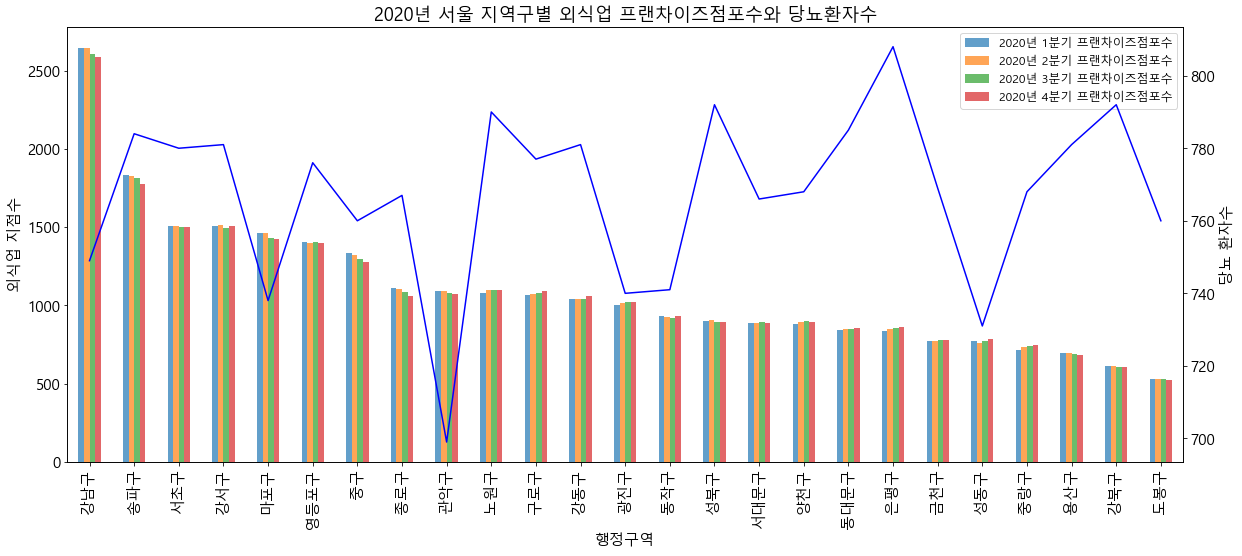

In [294]:
plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=12)  # 범례 폰트 크기
plt.rc('figure', titlesize=50)

df_sweet_pee_2020= df_sweet_pee_2020.sort_values(by=['2020년 1분기 프랜차이즈점포수'], ascending=False) 
ax1=df_sweet_pee_2020.plot(x="행정구역", y=["2020년 1분기 프랜차이즈점포수",
                                    "2020년 2분기 프랜차이즈점포수", "2020년 3분기 프랜차이즈점포수",
                                    "2020년 4분기 프랜차이즈점포수"], kind="bar",figsize=(20,8), alpha=0.7)
plt.ylabel('외식업 지점수')

ax2=ax1.twinx()
ax2.plot(df_sweet_pee_2020['행정구역'],df_sweet_pee_2020['당뇨환자수'],'b')
plt.ylabel('당뇨 환자수')

plt.title('2020년 서울 지역구별 외식업 프랜차이즈점포수와 당뇨환자수')

plt.show()

In [293]:
df_sweet_pee_2020.to_csv('df_sweet_pee_2020.csv')

### 비만과 외식업 지점수

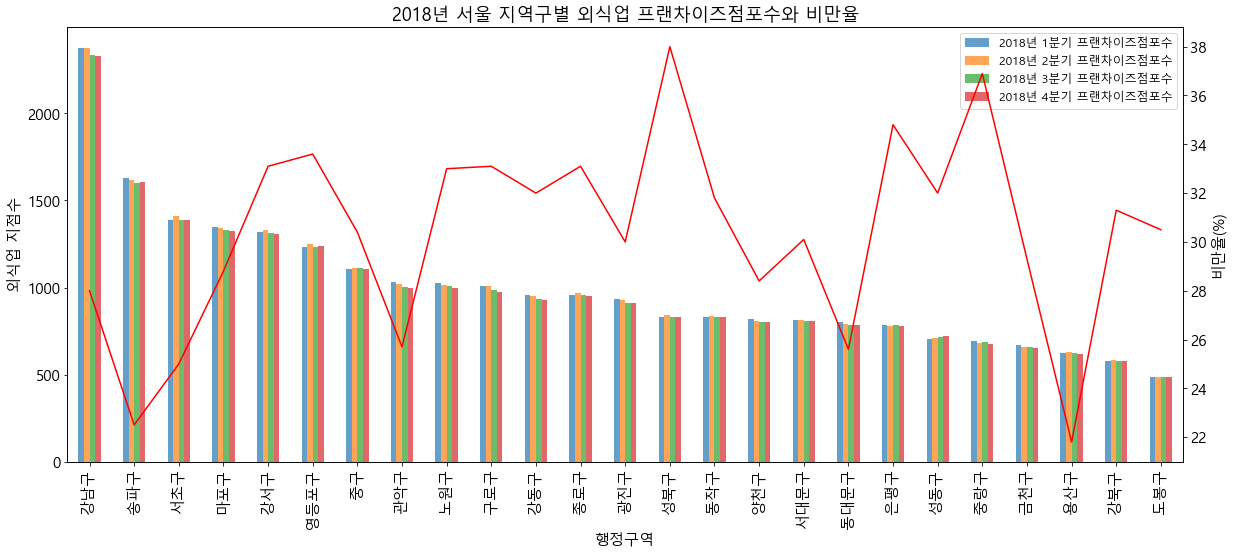

In [283]:
plt.rc('font', family='Malgun Gothic')
df_2018_pig1= df_2018_pig1.sort_values(by=['2018년 1분기 프랜차이즈점포수'], ascending=False) 

ax1=df_2018_pig1.plot(x="행정구역", y=["2018년 1분기 프랜차이즈점포수",
                                    "2018년 2분기 프랜차이즈점포수", "2018년 3분기 프랜차이즈점포수",
                                    "2018년 4분기 프랜차이즈점포수"], kind="bar",figsize=(20,8), alpha=0.7)
plt.ylabel('외식업 지점수')

ax2=ax1.twinx()
ax2.plot(df_2018_pig1['행정구역'],df_2018_pig1['비만율'],'r')
plt.ylabel('비만율(%)')
plt.title('2018년 서울 지역구별 외식업 프랜차이즈점포수와 비만율')
plt.show()

In [295]:
df_2018_pig1.to_csv('df_2018_pig1.csv')

### 분석결과

1. 당뇨와 외식업 점포수와의 상관관계는 크게 두드러지지않음.
2. 비만과 외식업 점포수와의 상관관계 또한 크게 두드러지지않음.
3. 외식업 점포수와 질병과의 관계는 나타나지 않기 때문에,  
   질병과 관련된 창업을 할 때는 외식업 프랜차이즈에 의식하지 않고 하는 것이 좋아보임.